<a href="https://colab.research.google.com/github/awazbhujel/MachineLearning/blob/master/Future_Sales_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Future Sales Prediction**



**Predicting the future sales of a product helps a business manage the manufacturing and advertising cost of the product. There are many more benefits of predicting the future sales of a product**

**Future Sales Prediction (Case Study)**

The dataset given here contains the data about the sales of the product. The dataset is about the advertising cost incurred by the business on various advertising platforms. Below is the description of all the columns in the dataset:

1. **TV**: Advertising cost spent in dollars for advertising on TV;
2. **Radio**: Advertising cost spent in dollars for advertising on Radio;
3. **Newspaper**: Advertising cost spent in dollars for advertising on Newspaper;
4.**Sales**: Number of units sold;

So, in the above dataset, the sales of the product depend on the advertisement cost of the product.lets analyze the data and do the prediction of future sales

**Import all the necessay library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


checking the null values

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#checking the dupllicate values
df[df.duplicated()].sum()

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [ ]:
#removing duplicates
df.drop_duplicates(inplace=True)

**Univariate Analysis**

In [ ]:
df["Sales"].describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

<Axes: ylabel='Frequency'>

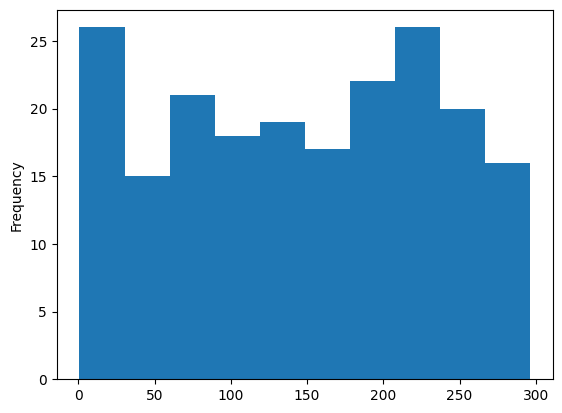

In [ ]:
df["TV"].plot(kind="hist")

it shows uniform distribution

<Axes: ylabel='Frequency'>

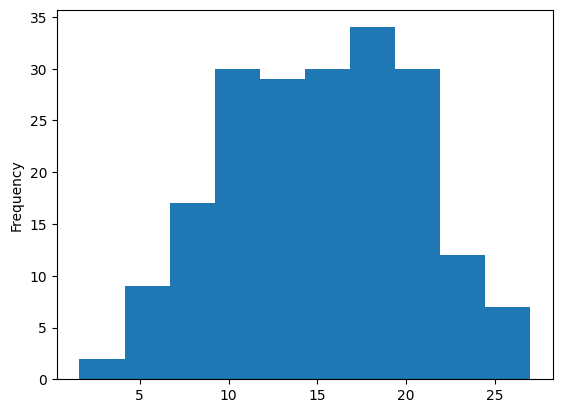

In [ ]:
df["Sales"].plot(kind="hist")

<Axes: >

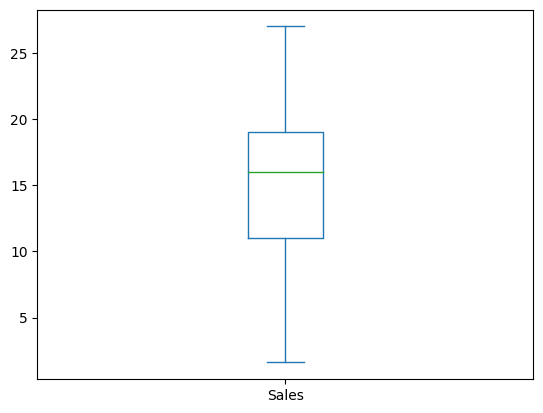

In [ ]:
df["Sales"].plot(kind="box")

In [ ]:
df["Sales"].skew()

-0.07373923537186912

it indicates a slight left skew (negative skew) in the data

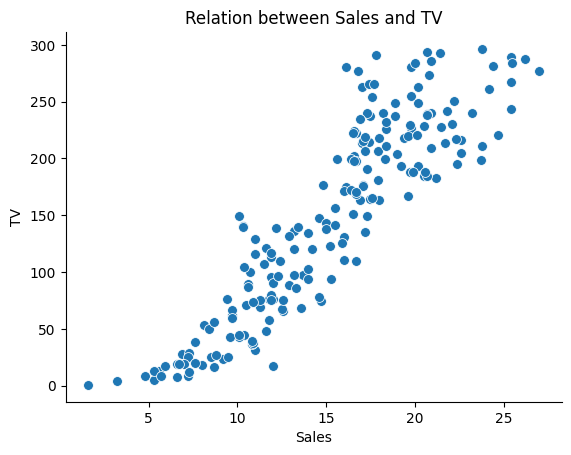

In [ ]:
sns.scatterplot(data=df,x="Sales",y="TV",marker="o",s=50)
plt.title("Relation between Sales and TV")
# Remove the top and right spines
sns.despine()
plt.show()

from the above plot we can see the Sales and Tv are sort of linear which means as tv cost advertisement increase sales also increases

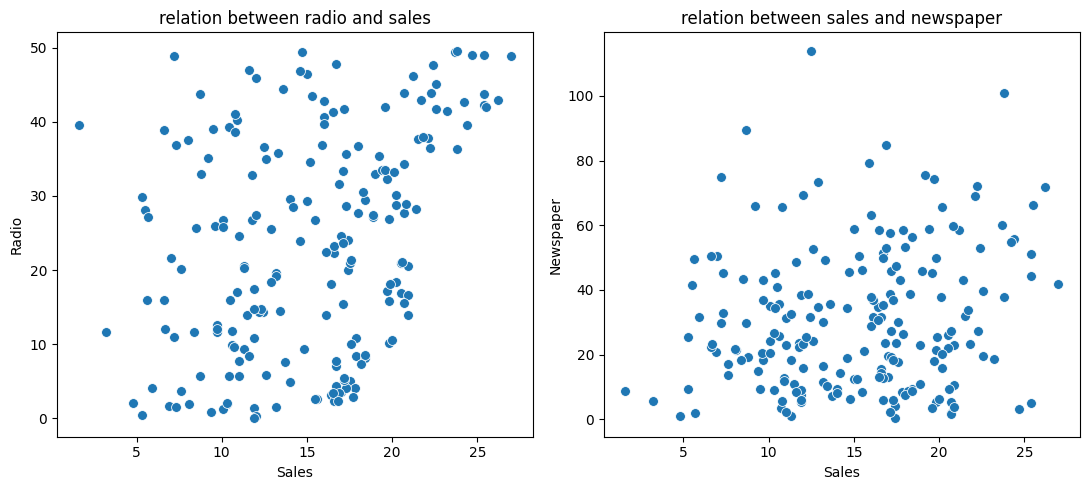

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(11,5)) #starts from 0 so 0,1=2
sns.scatterplot(ax=axes[0],data=df,x="Sales",y="Radio",marker="o",s=50)
axes[0].set_title("relation between radio and sales")
sns.scatterplot(data=df,x="Sales",y="Newspaper",s=50)
axes[1].set_title("relation between sales and newspaper")
# Adjust the spacing between subplots
plt.tight_layout()

Conclusion:From two scatter plots we can see no positive relation between sales

checking correlation with sales

In [ ]:
df.corr()["Sales"].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

<Axes: >

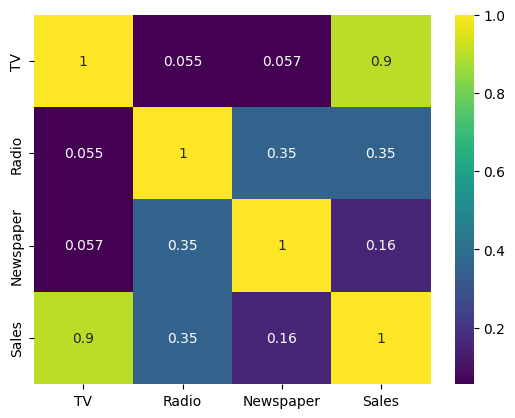

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

conclusion: we can see that TV is highly correlated with sales

**Future Sales Prediction Model**

Now after doing EDA and  knowing the data properly we will train machine learning model to predict the future sales of a product.But before we train the model, let’s split the data into training and test sets:

In [ ]:
X= df.drop("Sales",axis=1)
y = df[["Sales"]]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_scaled = StandardScaler()

In [ ]:
X_train_scaled =x_scaled.fit_transform(X_train)

In [ ]:
X_test_scaled = x_scaled.transform(X_test)

In [ ]:
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [ ]:
X_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [ ]:
X_train_scaled

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

In [ ]:
X_test_scaled

array([[ 0.15781217,  0.59112727,  1.13227461],
       [ 0.53925283,  1.68199613,  1.13227461],
       [ 1.69783431,  0.36753303,  0.65380096],
       [-1.64363349,  0.95023317,  0.75245532],
       [ 0.83513672,  1.77007871, -1.31928629],
       [-0.89025846,  0.82149709,  1.12240918],
       [ 0.79354661,  1.42452397, -0.13543394],
       [-1.18851892, -0.76398933, -0.56951314],
       [ 0.86009078, -1.31958713, -0.8309472 ],
       [ 0.29803023, -0.02545078,  0.07667294],
       [-1.40835233,  0.11683646, -1.36861347],
       [-1.11484502, -1.16374872, -0.01211599],
       [ 1.00387371, -1.31958713,  2.70581169],
       [-1.71849568,  0.47594236, -1.01345777],
       [-0.12500054, -1.40766971, -0.16503025],
       [ 0.23980408, -1.02146148,  0.25918351],
       [-1.69591819,  0.35398186,  0.56501203],
       [ 0.56539519,  0.02875388, -0.7766873 ],
       [-0.88788188, -0.17451361,  0.12600012],
       [ 1.03833409,  0.31332837, -0.93453428],
       [ 0.94445928,  0.63855635,  2.182

In [137]:
from sklearn.preprocessing import PowerTransformer

In [144]:
transformer = PowerTransformer(method='yeo-johnson')

In [145]:
#transform the scaled data
X_train_transformed=transformer.fit_transform(X_train_scaled)
X_test_transformed=transformer.fit_transform(X_test_scaled)

_lets use LinearRegression model in normal and scaling data

In [146]:
lr1 = LinearRegression()
lr2 = LinearRegression()

In [147]:
lr1.fit(X_train,y_train)
lr2.fit(X_train_transformed,y_train)

LinearRegression()

In [148]:
y_pred=lr1.predict(X_test)
y_pred2 = lr2.predict(X_test_transformed)

In [122]:
from sklearn.metrics import r2_score

In [149]:
r2 = r2_score(y_test,y_pred)*100
r2_pred2 = r2_score(y_test,y_pred2)*100
print("r2 score:",r2)
print("r2 score:",r2_pred2)

r2 score: 90.59011844150827
r2 score: 87.61944131195602


In [150]:
#lets do cross validation
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr1,X_train,y_train,cv=5,scoring="r2")*100)

88.79742522131366

In [151]:
np.mean(cross_val_score(lr2,X_train_transformed,y_train,cv=5,scoring="r2")*100)

87.90570230227559

Now let’s input values into the model according to the features we have used to train it and predict how many units of the product can be sold based on the amount spent on its advertising on various platforms:

In [152]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(lr1.predict(features))

[[21.37254028]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Summary**

So this is how we can train a machine learning model to predict the future sales of a product. Predicting the future sales of a product helps a business manage the manufacturing and advertising cost of the product